In [3]:
!pip install gdown
!gdown "https://drive.google.com/uc?id=1S63itu4MwCo9CPpwD8TPq_ERsX68vHg3"


Downloading...
From (original): https://drive.google.com/uc?id=1S63itu4MwCo9CPpwD8TPq_ERsX68vHg3
From (redirected): https://drive.google.com/uc?id=1S63itu4MwCo9CPpwD8TPq_ERsX68vHg3&confirm=t&uuid=2a1facc2-b249-4252-9df7-247129e30e14
To: /content/ISIC_2019_Training_Input.zip
100% 9.78G/9.78G [01:56<00:00, 83.6MB/s]


In [4]:
import zipfile

zip_path = "ISIC_2019_Training_Input.zip"
extract_to = "/content/images"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to: {extract_to}")


Files extracted to: /content/images


# **Main Idea:**
The primary idea behind this project is to use machine learning and deep learning techniques to automate the classification of skin lesions(changes in the skin texture). Skin lesions can be indicators of various skin conditions, including **skin cancer**, which is one of the most common and potentially life-threatening cancers globally. Early and accurate diagnosis of skin lesions is crucial for effective treatment.

The project leverages the ISIC 2019 dataset, a comprehensive dataset containing labeled images of skin lesions, to train a model that can classify these images into different categories like
*   Melanoma
*   Melanocytic nevus
*   Basal cell carcinoma
*   Actinic keratosis
*   Benign keratosis
*   Dermatofibroma
*   Vascular lesion
*   Squamous cell carcinoma.

By automating this process, the model can assist dermatologists and clinicians in making quick and reliable diagnoses, potentially improving patient outcomes.

# **Data Exploration**

Exploring data to check data quality and Null Values or Class imbalances

**Class Distribution:**
The dataset has an imbalance in class distribution.
The NV class has the highest number of samples, while others like BCC, DF, and UNK are underrepresented.

**Implication:** This imbalance may bias the model towards the majority class (NV). Techniques like oversampling, undersampling, or weighted loss functions can address this.

**Age Distribution:**
The majority of the patients are between 20 to 60 years old.
Implication: The dataset may not generalize well to younger or older populations outside this range.

**Missing Values:**
Missing values are observed in the following columns:
anatom_site_general: Some anatomical sites are unknown.

**lesion_id:** This column has significant missing data and might not be critical for training.

**sex:** A few entries have missing values.

**Metadata Columns:**
Features such as age_approx, sex, and anatom_site_general provide additional information that could enhance model performance.
These features may correlate with certain diagnoses and should be incorporated into the model.

**Diagnosis Labels:**
The ground truth data is one-hot encoded, which is converted into a single-label format (diagnosis) for multi-class classification tasks.

**Implication:** This simplifies the target variable for modeling but retains the same class information.

In [5]:
import pandas as pd

ground_truth = pd.read_csv("/content/ISIC_2019_Training_GroundTruth.csv")
metadata = pd.read_csv("/content/ISIC_2019_Training_Metadata.csv")
print("Ground Truth:")
print(ground_truth.info())
print(ground_truth.head())
print("\nMetadata:")
print(metadata.info())
print(metadata.head())

Ground Truth:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB
None
          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0

Met

<Axes: title={'center': 'Class Distribution'}>

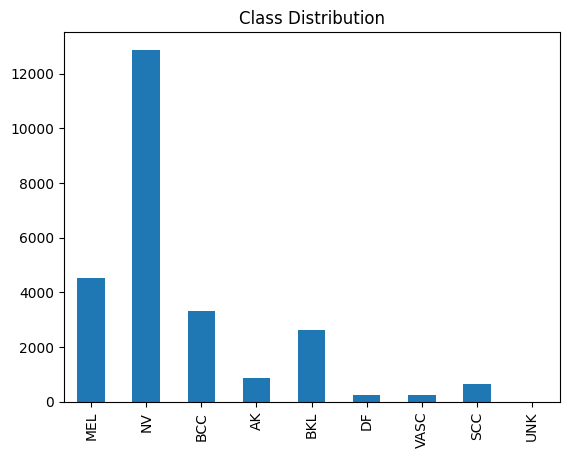

In [ ]:
ground_truth.sum(axis=0)[1:].plot(kind='bar', title="Class Distribution")


<Axes: >

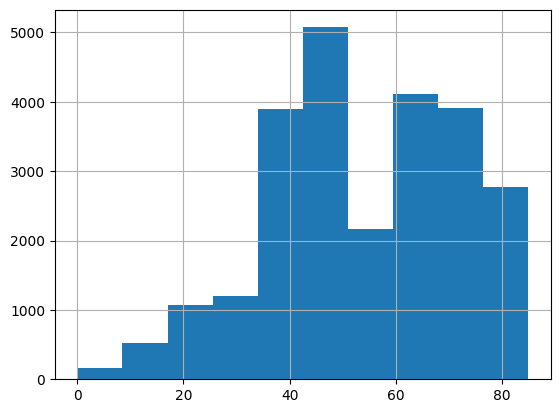

In [ ]:
metadata.describe()
metadata['age_approx'].hist()


Merging two csv file Metadata.csv and Groundtruth.csv on image column as it is common

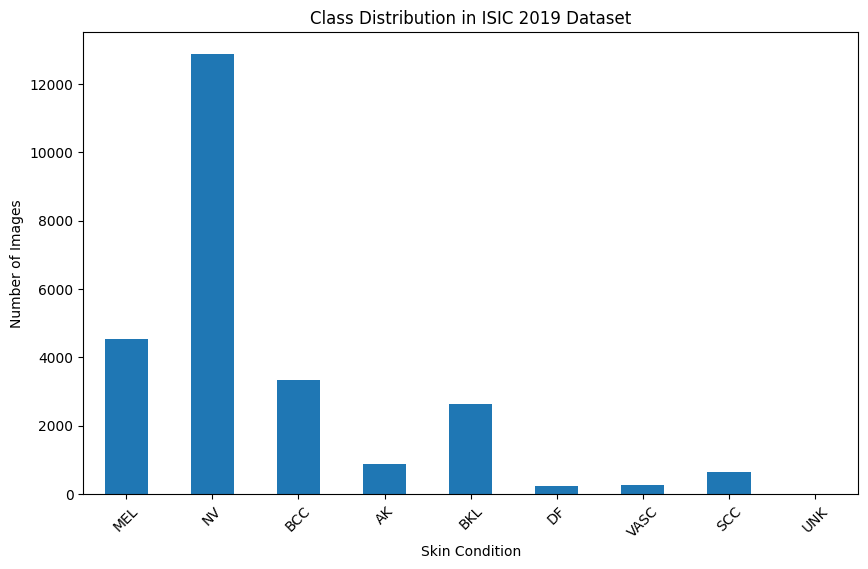

(          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  age_approx  \
 0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        55.0   
 1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        30.0   
 2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        60.0   
 3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        30.0   
 4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        80.0   
 
   anatom_site_general lesion_id     sex  
 0      anterior torso       NaN  female  
 1      anterior torso       NaN  female  
 2     upper extremity       NaN  female  
 3     upper extremity       NaN    male  
 4     posterior torso       NaN    male  ,
 image                     0
 MEL                       0
 NV                        0
 BCC                       0
 AK                        0
 BKL                       0
 DF                        0
 VASC                      0
 SCC                       0
 UNK      

In [7]:
import matplotlib.pyplot as plt
merged_data = pd.merge(ground_truth, metadata, on='image')
missing_data = merged_data.isnull().sum()
class_distribution = ground_truth.iloc[:, 1:].sum()


plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title("Class Distribution in ISIC 2019 Dataset")
plt.xlabel("Skin Condition")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

merged_data.head(), missing_data


# **Data Preprocessing**

Handling Missing Values and dropping lesion id column as it is useless. Also creating a new column 'diagnosis' for label

In [8]:
merged_data['age_approx'] = merged_data['age_approx'].fillna(merged_data['age_approx'].median())
merged_data['sex'] = merged_data['sex'].fillna('Unknown')
merged_data['anatom_site_general'] = merged_data['anatom_site_general'].fillna('Unknown')
merged_data = merged_data.drop(columns=['lesion_id'])


merged_data['diagnosis'] = merged_data.iloc[:, 1:10].idxmax(axis=1)
missing_data_after = merged_data.isnull().sum()
prepared_data_sample = merged_data.head()
missing_data_after, prepared_data_sample


(image                  0
 MEL                    0
 NV                     0
 BCC                    0
 AK                     0
 BKL                    0
 DF                     0
 VASC                   0
 SCC                    0
 UNK                    0
 age_approx             0
 anatom_site_general    0
 sex                    0
 diagnosis              0
 dtype: int64,
           image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  age_approx  \
 0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        55.0   
 1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        30.0   
 2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        60.0   
 3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        30.0   
 4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        80.0   
 
   anatom_site_general     sex diagnosis  
 0      anterior torso  female        NV  
 1      anterior torso  female        NV  
 2     upper extremity

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   MEL                  25331 non-null  float64
 2   NV                   25331 non-null  float64
 3   BCC                  25331 non-null  float64
 4   AK                   25331 non-null  float64
 5   BKL                  25331 non-null  float64
 6   DF                   25331 non-null  float64
 7   VASC                 25331 non-null  float64
 8   SCC                  25331 non-null  float64
 9   UNK                  25331 non-null  float64
 10  age_approx           25331 non-null  float64
 11  anatom_site_general  25331 non-null  object 
 12  sex                  25331 non-null  object 
 13  diagnosis            25331 non-null  object 
dtypes: float64(10), object(4)
memory usage: 2.7+ MB


Linking images with dataframe

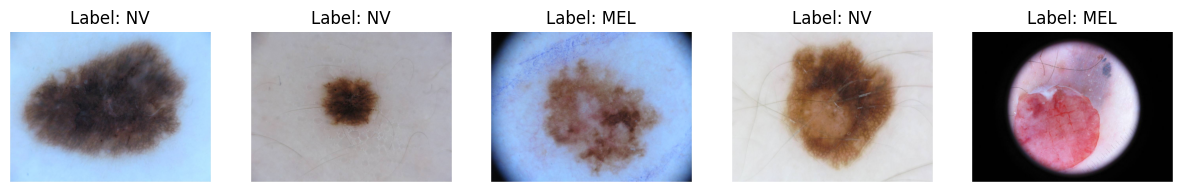

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


image_folder_path = "/content/images/ISIC_2019_Training_Input"
merged_data['image_path'] = merged_data['image'].apply(lambda x: os.path.join(image_folder_path, f"{x}.jpg"))

def display_images(dataframe, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 7))
    for i, (image_path, label) in enumerate(zip(dataframe['image_path'][:num_images], dataframe['diagnosis'][:num_images])):
        image = Image.open(image_path)
        ax = axes[i]
        ax.imshow(image)
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    plt.show()

display_images(merged_data, num_images=5)


Split the data into training and validation sets (80% training, 20% validation)

In [10]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(merged_data, test_size=0.2, stratify=merged_data['diagnosis'], random_state=42)
train_size = len(train_data)
val_size = len(val_data)
train_data_sample = train_data.head()
val_data_sample = val_data.head()

train_size, val_size, train_data_sample, val_data_sample


(20264,
 5067,
               image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  age_approx  \
 11880  ISIC_0033283  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        40.0   
 14068  ISIC_0055317  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        70.0   
 14712  ISIC_0056356  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        45.0   
 23632  ISIC_0070561  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0        60.0   
 20851  ISIC_0066198  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0        30.0   
 
       anatom_site_general     sex diagnosis  \
 11880     lower extremity  female        NV   
 14068     upper extremity  female       MEL   
 14712      anterior torso  female        NV   
 23632      anterior torso    male       MEL   
 20851           head/neck    male       BCC   
 
                                               image_path  
 11880  /content/images/ISIC_2019_Training_Input/ISIC_...  
 14068  /content/images/ISIC_2019_Training_Input/ISIC_...  
 14712  /content/imag

In [11]:
base_path = "/content/images/ISIC_2019_Training_Input"
train_data['image_path'] = train_data['image'].apply(lambda x: os.path.join(base_path, f"{x}.jpg"))
val_data['image_path'] = val_data['image'].apply(lambda x: os.path.join(base_path, f"{x}.jpg"))



Managing class imbalances by using class weights. they will be added in loss fucntion during training.

In [12]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_indices = {label: idx for idx, label in enumerate(merged_data['diagnosis'].unique())}
merged_data['diagnosis'] = merged_data['diagnosis'].map(class_indices)

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=list(class_indices.values()),
    y=train_data['diagnosis']
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)


{'NV': 0.2459223300970874,
 'MEL': 0.7001105583195135,
 'BCC': 0.952972159518435,
 'SCC': 5.0458167330677295,
 'AK': 3.64985590778098,
 'BKL': 1.2067651262505956,
 'DF': 13.261780104712042,
 'VASC': 12.53960396039604}

# **Image Preprocessing**

**Resize:** Scales images to a fixed size of 224x224 pixels.

**Random Horizontal Flip:** Randomly flips images horizontally to increase variation.

**Random Rotation:** Rotates images randomly within a range of ±15°.

**Color Jitter:**
Adjusts brightness, contrast, saturation, and hue with random intensity.

**Gaussian Blur:** Applies a Gaussian blur with a kernel size of 5x5 and a random sigma range (0.1 to 2.0).

**ToTensor:** Converts images to PyTorch tensors for model compatibility.

**Normalization:** Normalizes pixel values using mean [0.485, 0.456, 0.406] and standard deviation [0.229, 0.224, 0.225] to align with pre-trained models.

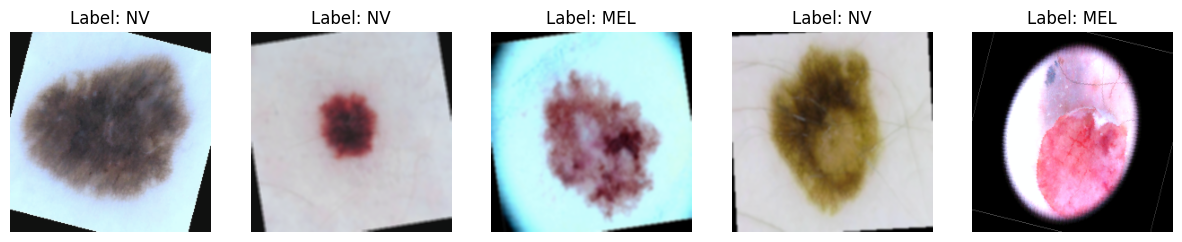

In [18]:
from torch.utils.data import Dataset
from torchvision import transforms
class SkinLesionDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_path = row['image_path']
        label = row['diagnosis']

        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label

device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Using device: {device}")

IMG_HEIGHT, IMG_WIDTH = 224, 224
train_transforms = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),  # Resize to fixed dimensions
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.RandomRotation(15),  # Randomly rotate up to ±15 degrees
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Random adjustments
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),  # Apply Gaussian blur with random intensity
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize for pre-trained models
])

val_transforms = transforms.Compose([
     transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),  # Resize to fixed dimensions
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.RandomRotation(15),  # Randomly rotate up to ±15 degrees
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Random adjustments
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),  # Apply Gaussian blur with random intensity
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def display_processed_images(dataset, num_images=5):
    """Display processed images with labels."""
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        image, label = dataset[i]
        image = image.permute(1, 2, 0).numpy()
        image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
        image = image.clip(0, 1)
        axes[i].imshow(image)
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

if __name__ == "__main__":
    skin_dataset = SkinLesionDataset(merged_data, transform=image_transforms)
    display_processed_images(skin_dataset, num_images=5)

# **Model Training**

**Model Architecture:**
EfficientNet-B0 pre-trained model used for robust feature extraction.
Modified the classifier layer to match the number of target classes.

**Transfer Learning:**
Utilized pre-trained weights from ImageNet for faster and more efficient training.

**Class Imbalance Handling:**
Computed class weights to penalize underrepresented classes.
Used weighted loss function (nn.CrossEntropyLoss) to balance training.

**Learning Rate Scheduling:**
Used ReduceLROnPlateau to lower the learning rate when validation loss plateaus.

**Mixed Precision Training:**
Enabled mixed precision training (if supported) for faster and memory-efficient computations.

**Early Stopping:**
Implemented to stop training if validation loss doesn't improve for a defined number of epochs, preventing overfitting.

**Batch Size Optimization:**
Used a larger batch size (64) for stable and efficient training.

**Why this model?**

I have chosen EfficientNet-B0 for this project due to its exceptional balance between accuracy and computational efficiency, making it ideal for our dataset of 25,000 images. Its pre-trained weights from ImageNet enable effective transfer learning, while its lightweight architecture ensures faster training with fewer resources. Compared to other models like ResNet or VGG, EfficientNet-B0 provides state-of-the-art performance with fewer parameters, reducing the risk of overfitting and offering better generalization for medical imaging tasks.

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import efficientnet_b0
from torch import nn, optim
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from tqdm import tqdm

if __name__ == "__main__":
    # Load dataset, define transformations, and set up DataLoaders
    train_dataset = SkinLesionDataset(train_data, transform=train_transforms)
    val_dataset = SkinLesionDataset(val_data, transform=val_transforms)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)  # Larger batch size
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)

    # Define model, optimizer, and loss
    model = efficientnet_b0(weights="DEFAULT")
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(class_indices))
    model.to(device)

    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

    # Mixed precision training setup
    use_mixed_precision = torch.cuda.is_available()
    scaler = torch.amp.GradScaler() if use_mixed_precision else None

    # Early stopping parameters
    patience = 3
    best_val_loss = float('inf')
    early_stop_counter = 0

    # Training loop
    num_epochs = 20
    for epoch in range(num_epochs):
        print(f"\nEpoch [{epoch + 1}/{num_epochs}]")
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training phase with progress bar
        for batch_idx, (inputs, labels) in enumerate(tqdm(train_loader, desc="Training")):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            if use_mixed_precision:
                with torch.amp.autocast():  # Use mixed precision if supported
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            if (batch_idx + 1) % 10 == 0:
                print(f"Batch [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item():.4f}")

        # Calculate and display average training accuracy
        train_acc = 100 * correct_train / total_train
        print(f"Average Training Loss: {running_loss / len(train_loader):.4f}, Training Accuracy: {train_acc:.2f}%")


        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validating"):
                inputs, labels = inputs.to(device), labels.to(device)

                if use_mixed_precision:
                    with torch.amp.autocast():
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                else:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        # Calculate and display validation accuracy
        val_acc = 100 * correct_val / total_val
        print(f"Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {val_acc:.2f}%")

        # Save the best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
            print("Best model saved!")
        else:
            early_stop_counter += 1

        # Check for early stopping
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break


        scheduler.step(val_loss)

Epoch [1/20]
Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 317/317 [11:12<00:00,  2.12s/it]
Average Training Loss: 1.4315, Training Accuracy: 49.18%
Validating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [01:24<00:00,  1.05s/it]
Validation Loss: 1.3314, Validation Accuracy: 48.96%
Best model saved!

Epoch [2/20]
Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 317/317 [11:24<00:00,  2.16s/it]
Average Training Loss: 1.1370, Training Accuracy: 58.89%
Validating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [01:26<00:00,  1.08s/it]
Validation Loss: 1.1301, Validation Accuracy: 56.40%
Best model saved!

Epoch [3/20]
Training: 100%|████████████████████████████████████████████████████████

Model has achieved 74.5% of validation accuracy with training accuracy of 76%

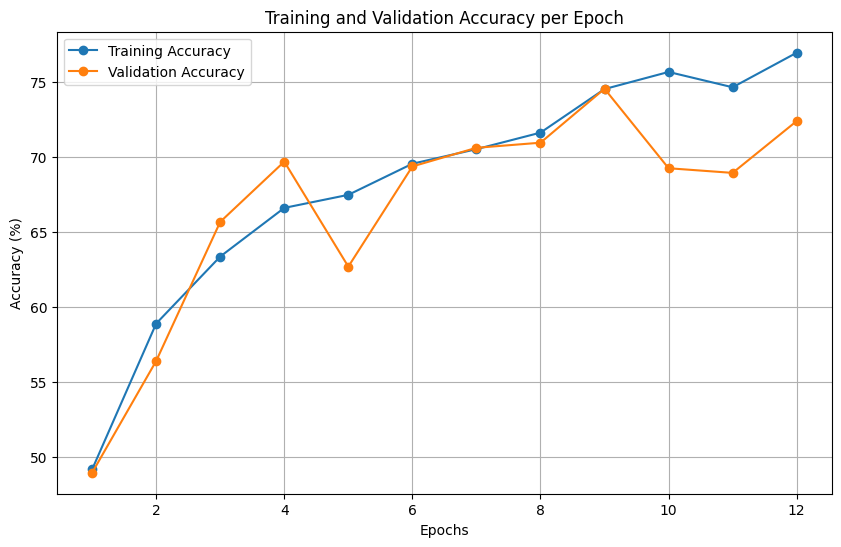

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Training and Validation Accuracies per Epoch
training_accuracies = [49.18, 58.89, 63.35, 66.59, 67.46, 69.53, 70.50, 71.60, 74.50, 75.64, 74.62, 76.92]
validation_accuracies = [48.96, 56.40, 65.66, 69.67, 62.68, 69.35, 70.59, 70.93, 74.52, 69.23, 68.92, 72.37]

epochs = np.arange(1, len(training_accuracies) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracies, label="Training Accuracy", marker='o')
plt.plot(epochs, validation_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy per Epoch")
plt.legend()
plt.grid(True)
plt.show()


# **Fine Tuning Techniques**

**1. Adapter Layers**

Adapter layers were added to the base model to learn additional task-specific parameters while freezing most of the original model weights. This ensures the base model remains largely intact while improving classification performance.

Adapter layers were introduced in intermediate feature layers of the model.
Improved the model's ability to generalize across different types of skin lesions.
**Validation Accuracy: 76%**

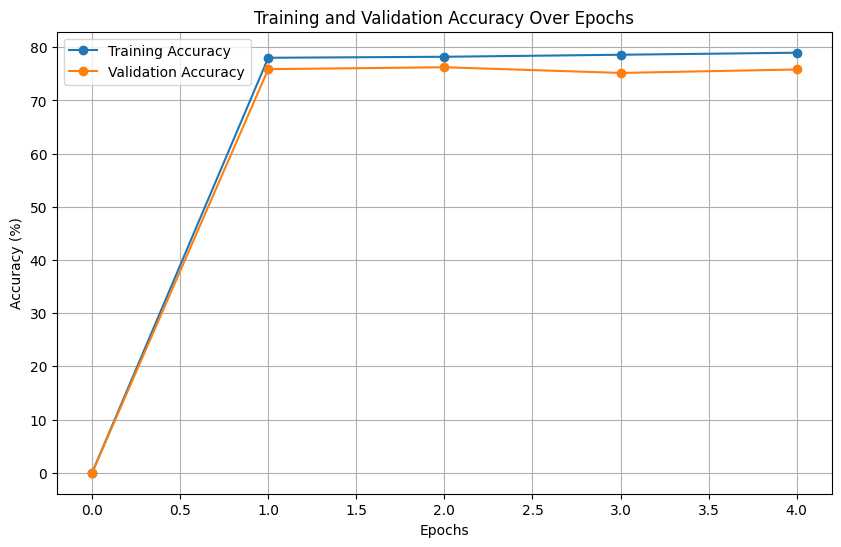

In [23]:
import matplotlib.pyplot as plt

# Adjusted data to start from 0 and include epoch 0 for baseline visualization
epochs = [0, 1, 2, 3, 4]
training_accuracies = [0, 78.02, 78.21, 78.59, 78.97]
validation_accuracies = [0, 75.88, 76.24, 75.17, 75.82]


# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


**2. LoRA (Low-Rank Adaptation)**

LoRA introduces low-rank learnable matrices into the pre-trained model layers to enable efficient fine-tuning. This technique allows the model to learn task-specific features with minimal computational overhead.

LoRA layers were applied to the fully connected layers in the classifier.
Enabled efficient parameter tuning without modifying the pre-trained backbone.
**Validation Accuracy: 80%**

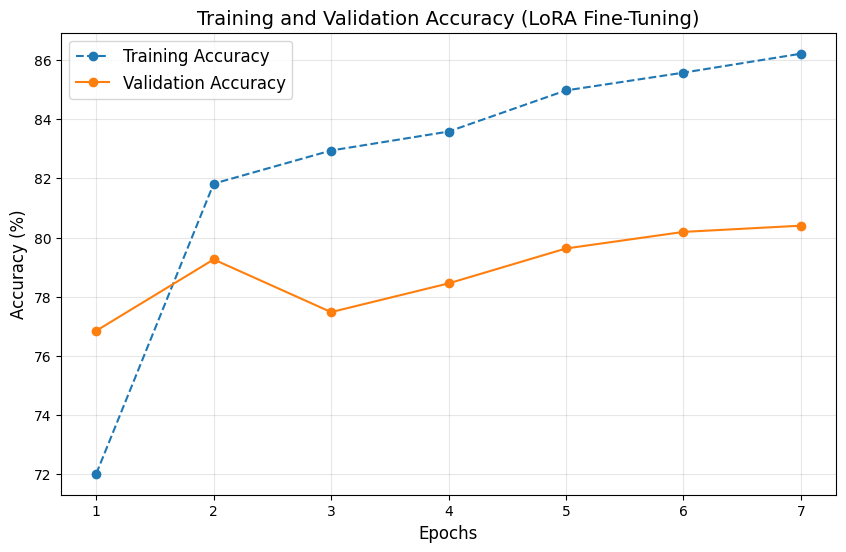

In [22]:
import matplotlib.pyplot as plt

# Training and validation accuracy values across epochs for LoRA fine-tuning
epochs = list(range(1, 8))
training_accuracy = [72.02, 81.82, 82.94, 83.58, 84.97, 85.57, 86.21]
validation_accuracy = [76.85, 79.26, 77.48, 78.45, 79.63, 80.19, 80.40]

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, label="Training Accuracy", marker="o", linestyle="--")
plt.plot(epochs, validation_accuracy, label="Validation Accuracy", marker="o", linestyle="-")
plt.title("Training and Validation Accuracy (LoRA Fine-Tuning)", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(epochs)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()
